## Import

In [235]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models
from torchsummary import summary
from torchvision.transforms.functional import resize
from torchvision import transforms
import torch.nn.functional as F
from torch.autograd import Variable
import h5py
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from matplotlib import pyplot as plt
import pickle
from skimage.transform import rescale, resize

## Reading 

In [236]:
class_results_path = './class_result_CIFAR.pickle'
loc_results_path = './loc_results_CIFAR.pickle'
feat_results_path = './feat_result_CIFAR.pickle'
lab_results_path = './lab_result_CIFAR.pickle'


In [237]:
with open(class_results_path, 'rb') as handle:
    class_results = pickle.load(handle)

with open(loc_results_path, 'rb') as handle:
    loc_results = pickle.load(handle)

with open(feat_results_path, 'rb') as handle:
    feat_results = pickle.load(handle)

with open(lab_results_path, 'rb') as handle:
    lab_results = pickle.load(handle)

    
print('class_results shape', class_results.shape)
print('loc_results shape', loc_results.shape)
print('feat results shape', feat_results.shape)
print('label_results shape', lab_results.shape)

print('--------------------------------------------')
class_results = class_results.reshape(78,6,128,10)
loc_results = loc_results.reshape(78,6,128,6)
print('class_results shape', class_results.shape)
print('loc_results shape', loc_results.shape)
print('--------------------------------------------')


class_results_1_batch = class_results[0,:,:,:]
loc_1_batch = loc_results[0,:,:,:]
feat_batch_1 = feat_results[0:128,:,:,:]
label_batch_1 = lab_results[0:128]
print('--------------------------------------------')


print('sample class results', class_results_1_batch.shape)
print('sample loc results', loc_1_batch.shape)
print('sample feat results', feat_batch_1.shape)
print('sample label results', label_batch_1.shape)


# Convert to Tensor
class_results_1_batch = torch.from_numpy(class_results_1_batch)
loc_1_batch = torch.from_numpy(loc_1_batch)
feat_batch_1 = torch.from_numpy(feat_batch_1)
label_batch_1 = torch.from_numpy(label_batch_1)


class_results shape (468, 128, 10)
loc_results shape (468, 128, 6)
feat results shape (9984, 3, 100, 100)
label_results shape (9984,)
--------------------------------------------
class_results shape (78, 6, 128, 10)
loc_results shape (78, 6, 128, 6)
--------------------------------------------
--------------------------------------------
sample class results (6, 128, 10)
sample loc results (6, 128, 6)
sample feat results (128, 3, 100, 100)
sample label results (128,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


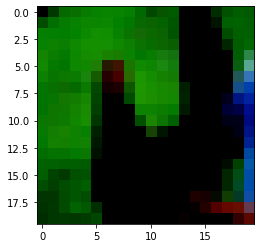

In [238]:
def resize_tensor(input_tensors, h, w):
    final_output = None
    batch_size, channel, height, width = input_tensors.shape
    for img in input_tensors:
        img = img.cpu().numpy()
        img_PIL = resize(img, (channel,h,w))
        img_PIL = torch.from_numpy(img_PIL)
        img_PIL = torch.unsqueeze(img_PIL,0)
        if final_output is None:
            final_output = img_PIL
        else:
            final_output = torch.cat((final_output, img_PIL), 0)
    return final_output

test_imgs = resize_tensor(feat_batch_1, 20, 20)
img = test_imgs[25]
img = img.permute(1,2,0)
plt.imshow(img)

In [239]:
def resize_tensor(input_tensors, h, w):
    final_output = None
    channel, height, width = input_tensors.shape
#     input_tensors = torch.squeeze(input_tensors, 1)
    img_PIL = transforms.ToPILImage()(input_tensors)
    img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
    img_PIL = torchvision.transforms.ToTensor()(img_PIL)
    return img_PIL



In [240]:
def convert_img(img, h, w):
    img = img / 2 + 0.5
    npimg = img.numpy()
    x = np.transpose(npimg, (1, 2, 0))
    x = resize(x, (h, w, 3))
    return x

# for idx_img in range(128):
#     real_img = feat_batch_1[idx_img]
#     print(real_img.shape)
#     real_img = real_img.permute(1, 2, 0)
#     real_img = transforms.ToPILImage()(real_img)
# # #     img_PIL = torchvision.transforms.Resize([100,100])(img_PIL)
#     real_img = torchvision.transforms.ToTensor()(real_img)
# #     img = real_img / 2 + 0.5
# #     npimg = img.numpy()
# #     x = np.transpose(npimg, (1, 2, 0))
#     plt.imshow(real_img)
#     plt.show()
#     break
    


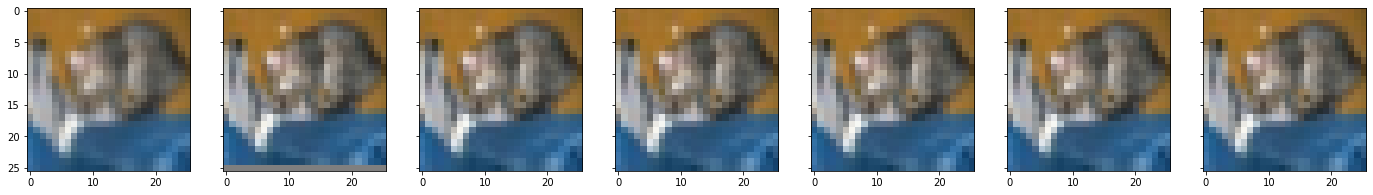

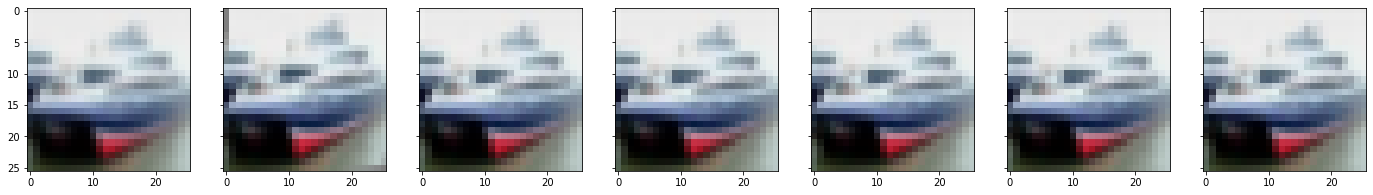

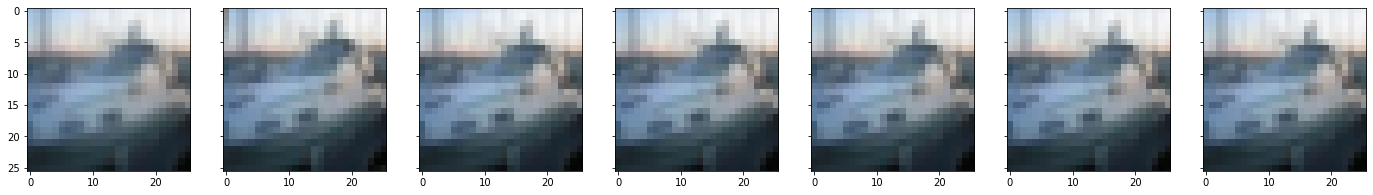

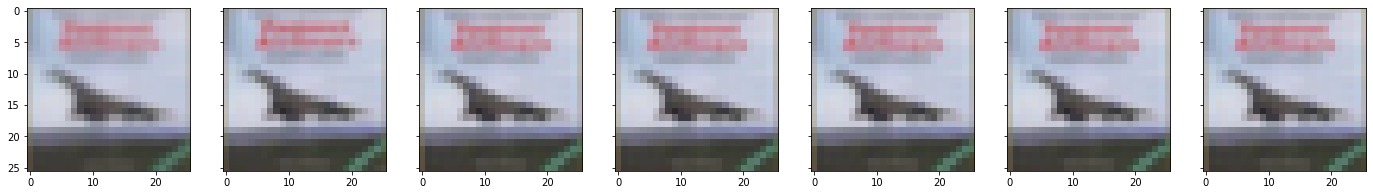

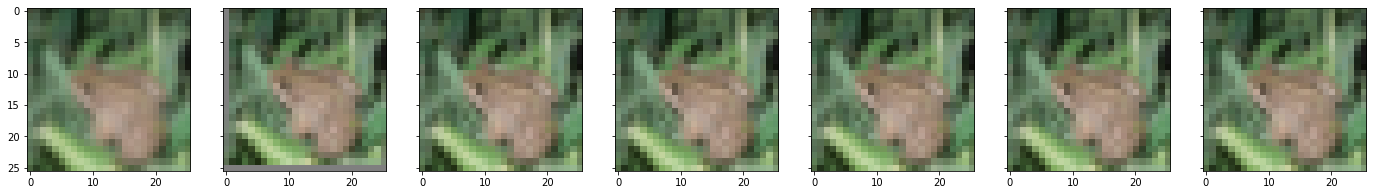

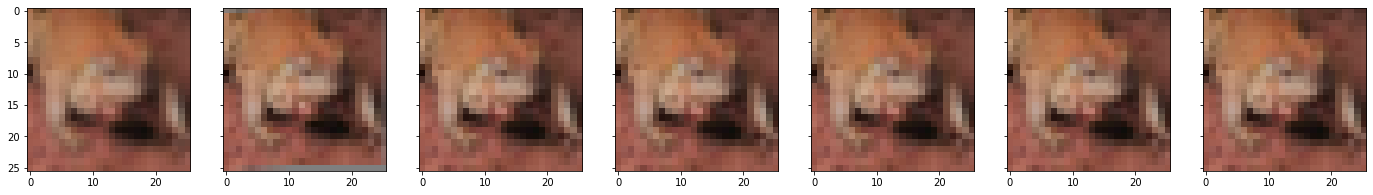

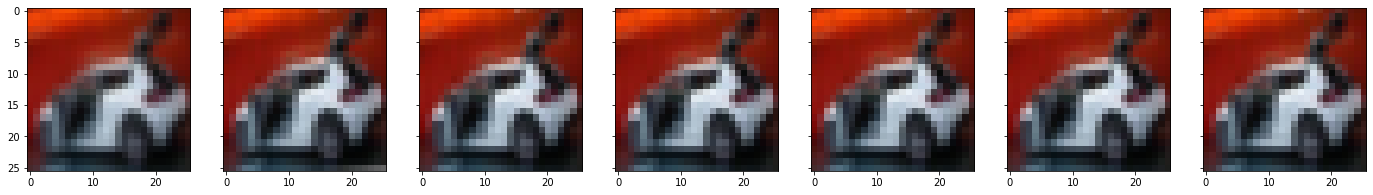

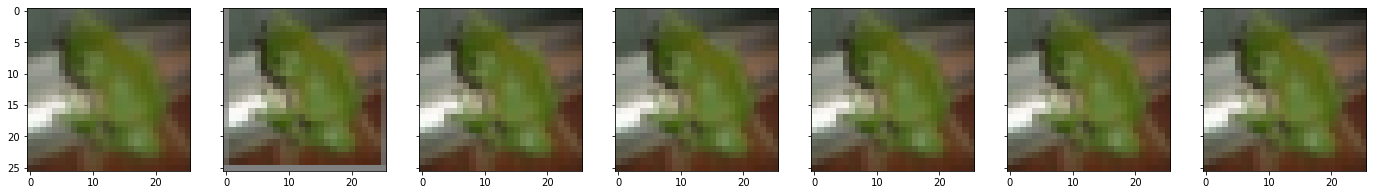

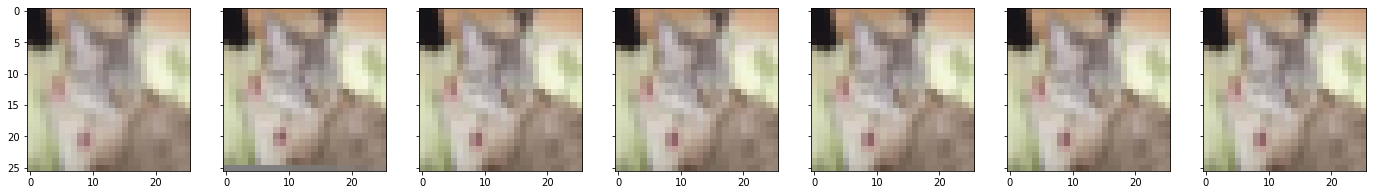

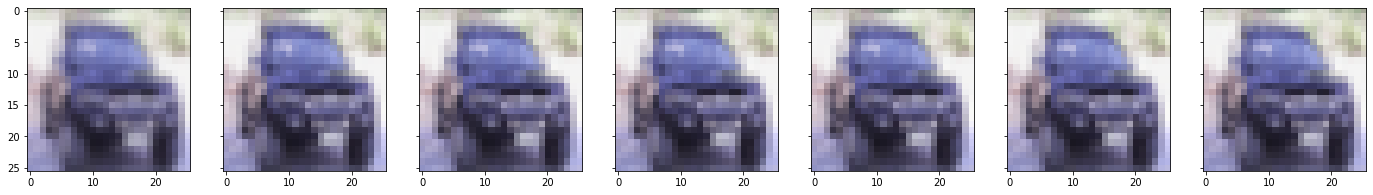

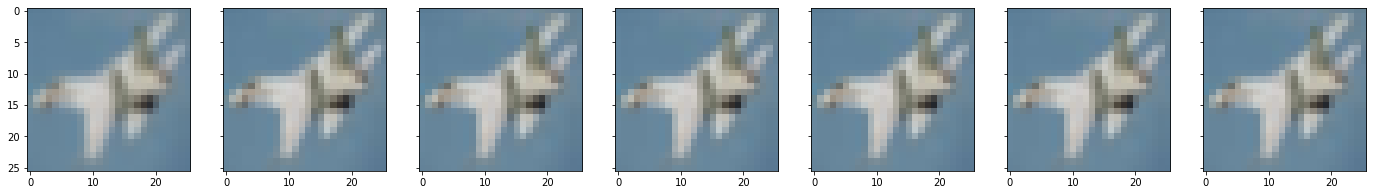

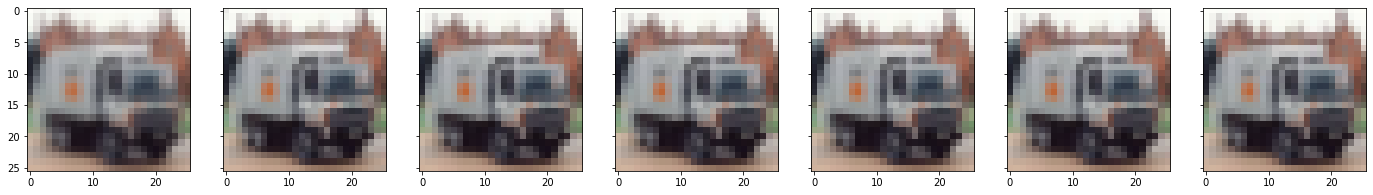

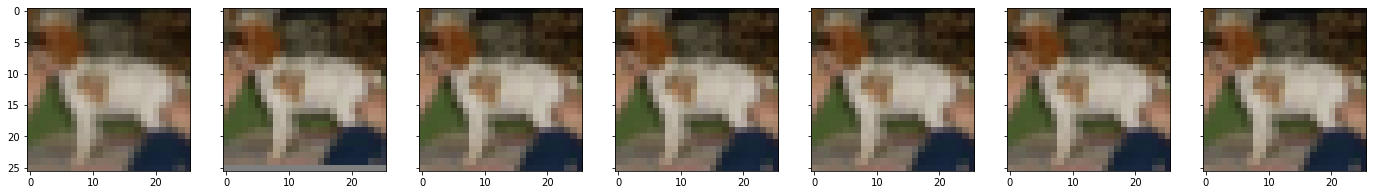

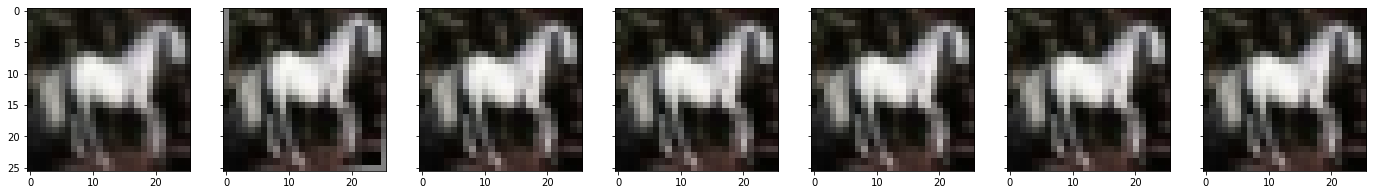

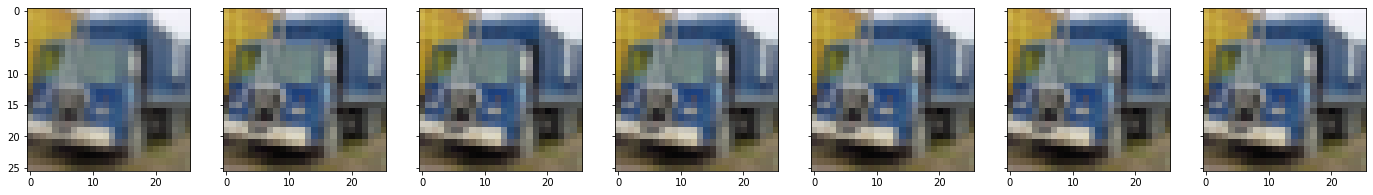

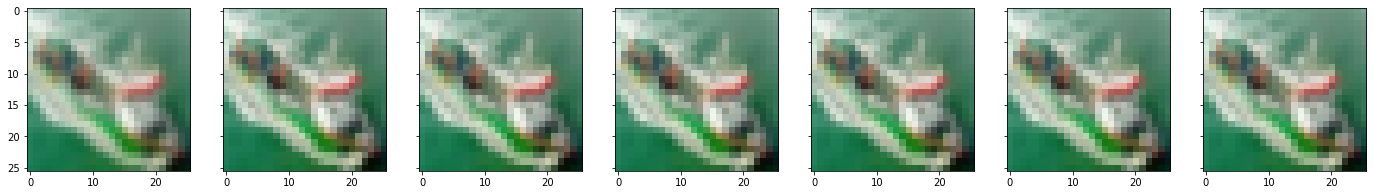

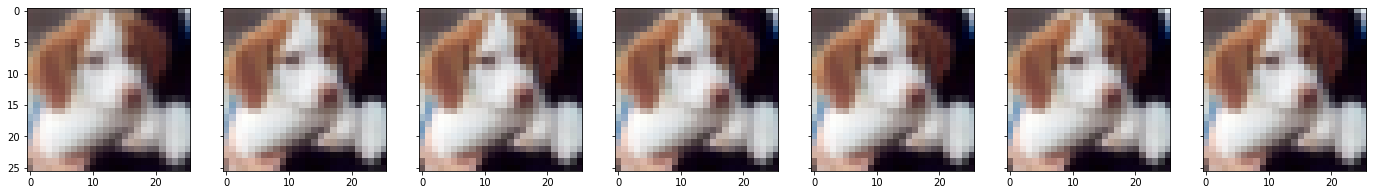

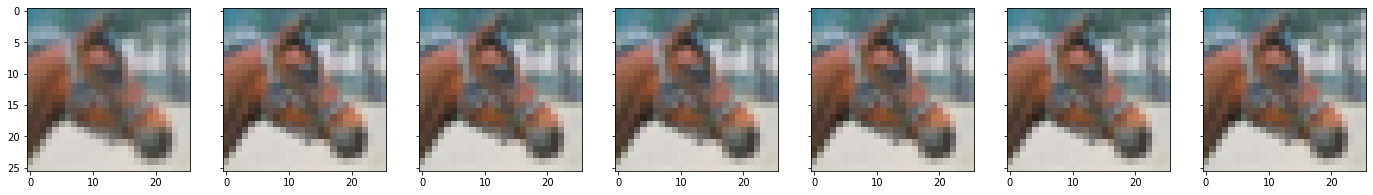

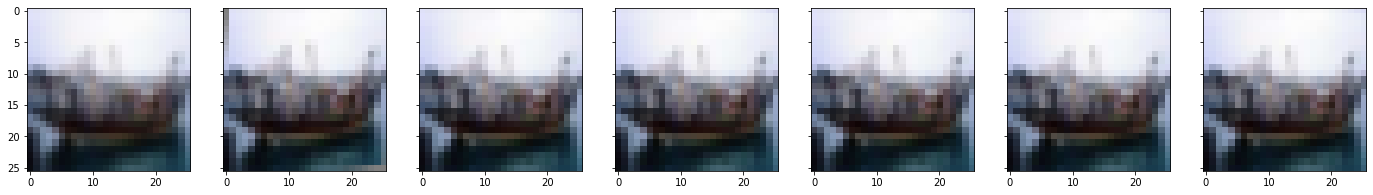

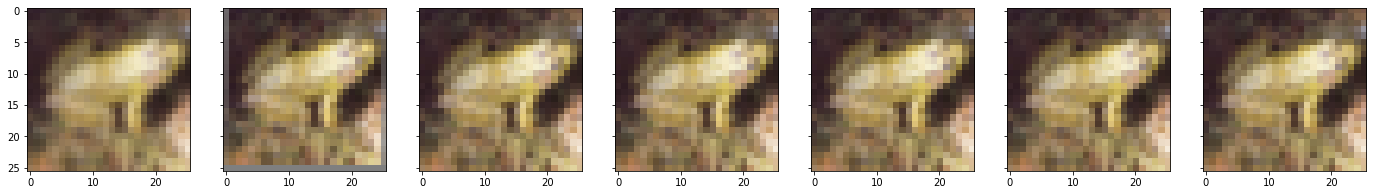

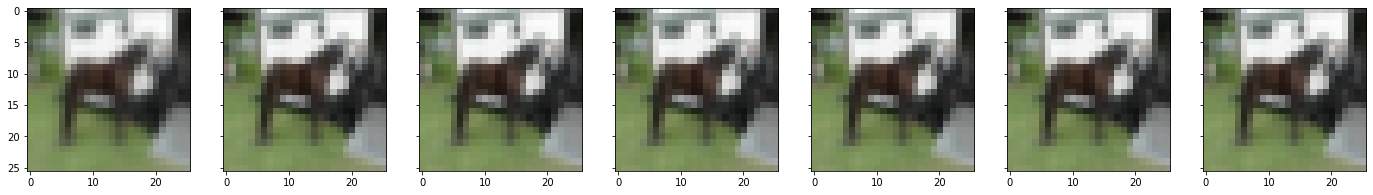

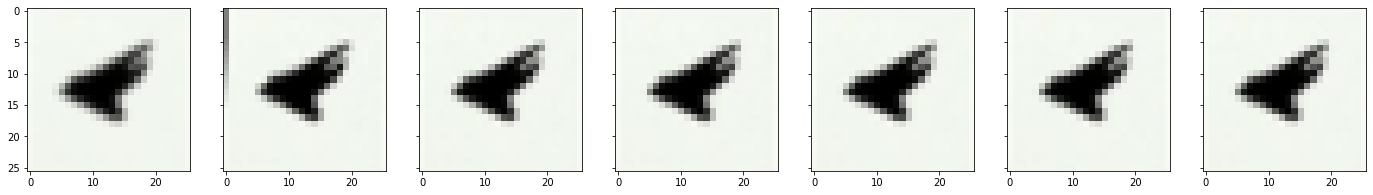

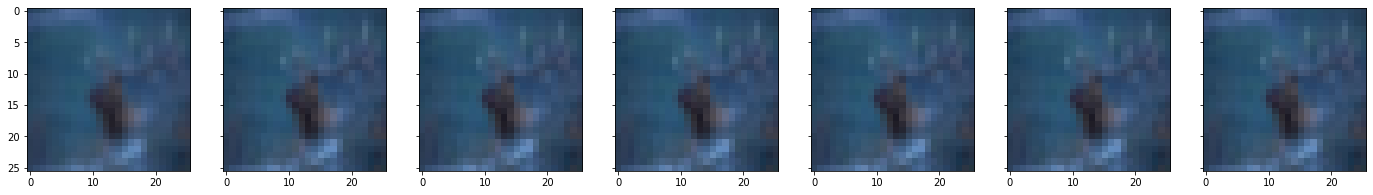

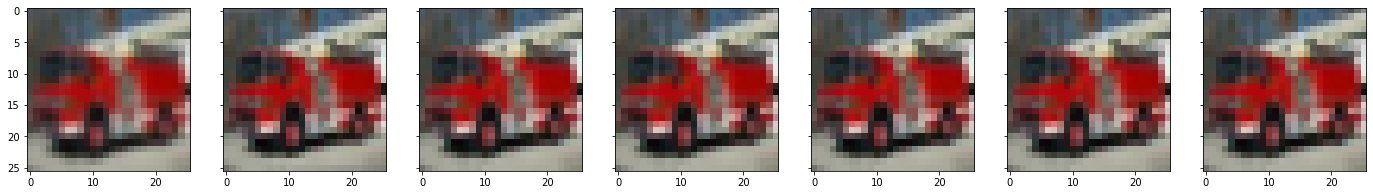

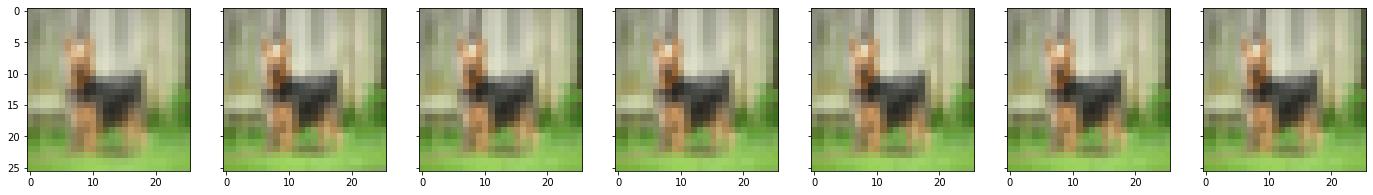

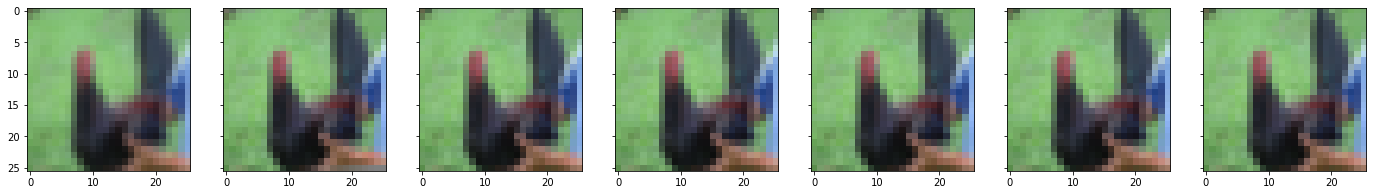

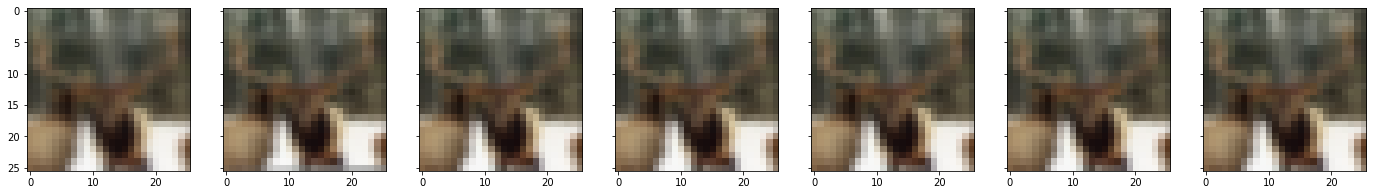

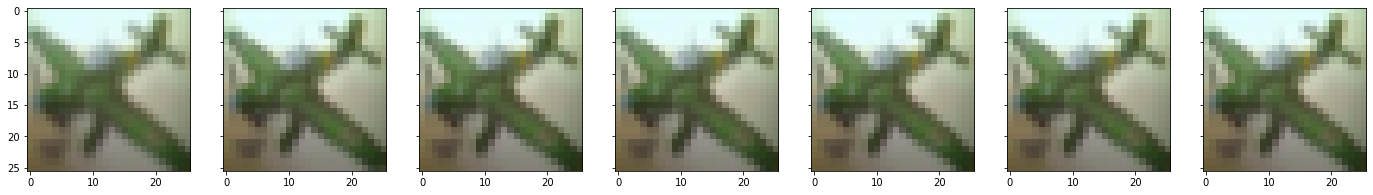

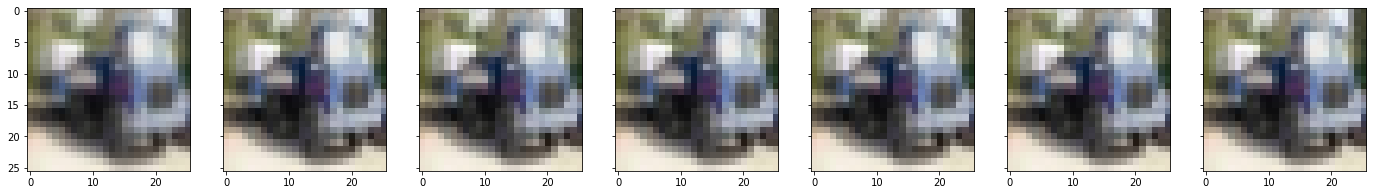

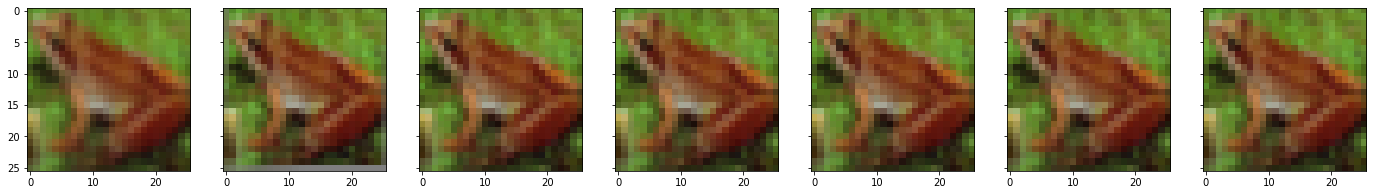

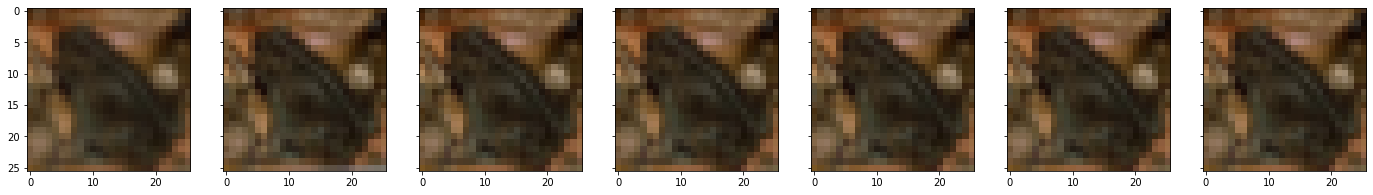

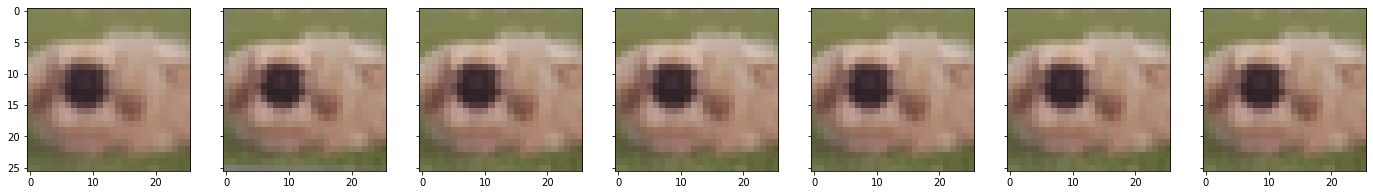

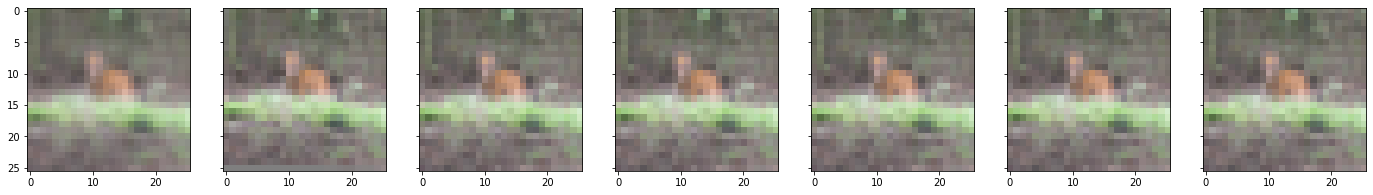

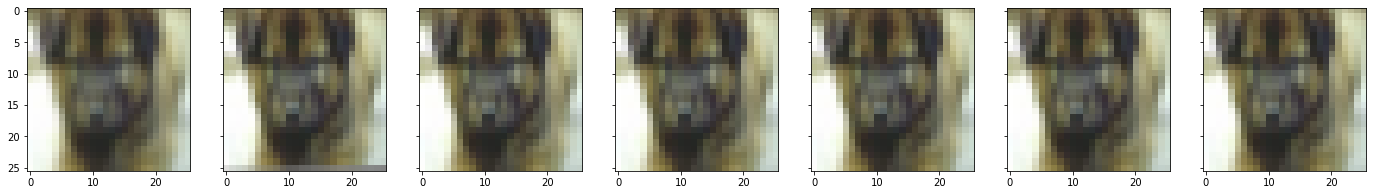

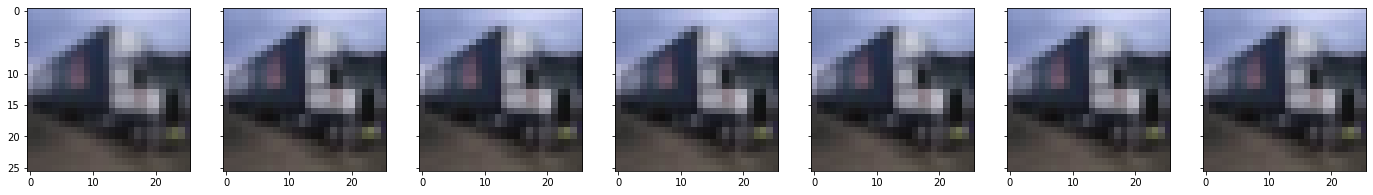

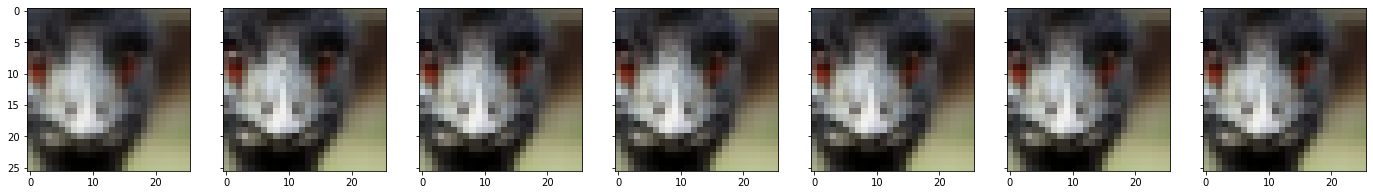

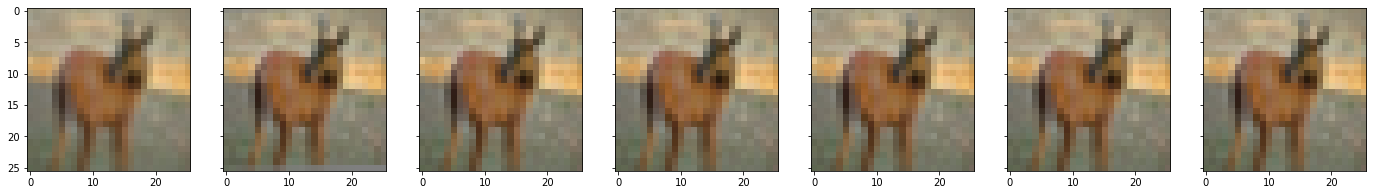

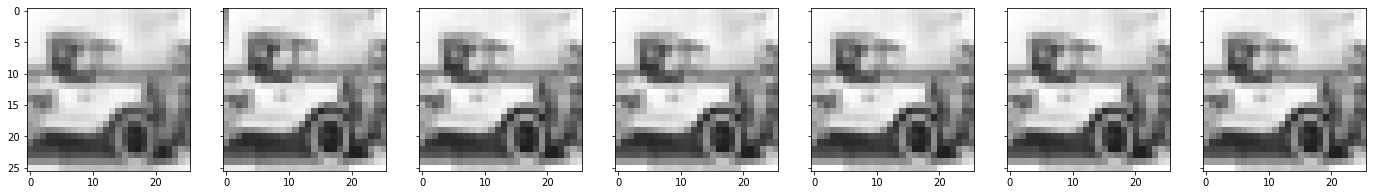

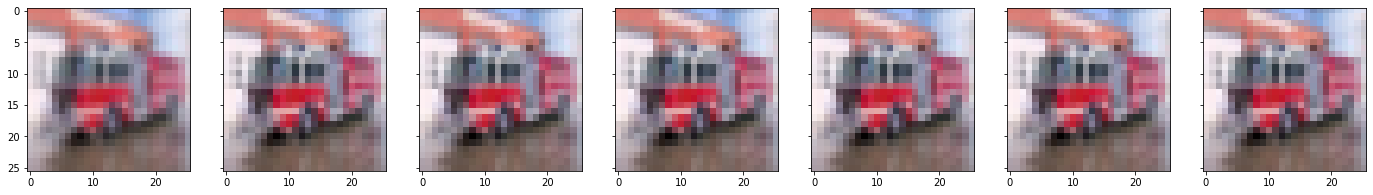

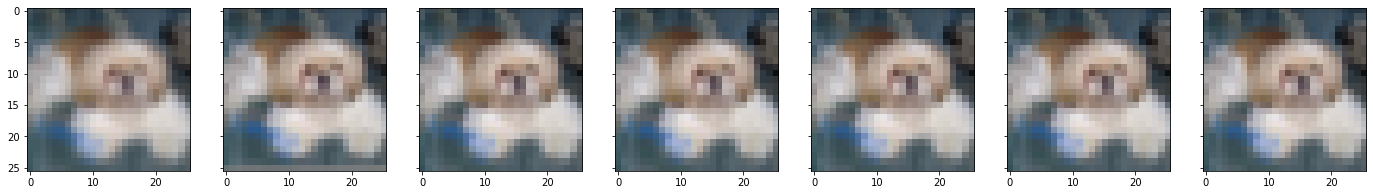

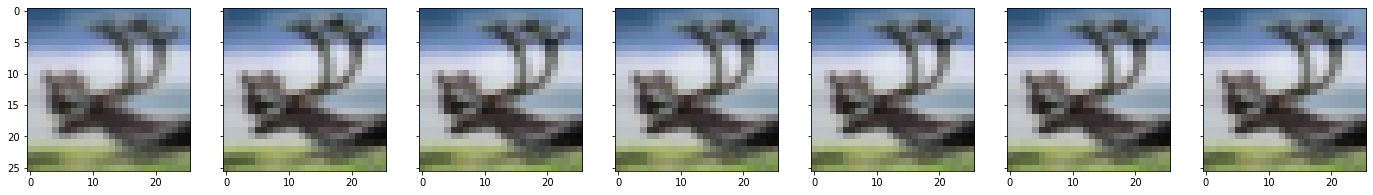

KeyboardInterrupt: 

In [243]:
h = 26
w = 26
for idx_img in range(128):
    fig, axs = plt.subplots(1, 7, figsize=(24,3), sharey=True) # change here 
    real_img = feat_batch_1[idx_img]
    reshaped_real = convert_img(real_img, 26,26)
    axs[0].imshow(reshaped_real)
    #Using predicted locations
    loc_temp = loc_1_batch[:,idx_img,:] # all six glimpses for one image
    for i in range(6): # change here
        loc_glimpse = loc_temp[i] # get ith glimpse location
        loc_glimpse = loc_glimpse.view(-1,2,3)
        grid = F.affine_grid(loc_glimpse, [1,3,w,h])
        output_pic = F.grid_sample(real_img.view(1,3,100,100), grid)
        output_pic = output_pic.reshape(3,26,26)
        axs[i+1].imshow(convert_img(output_pic,26,26))
        plt.imshow(convert_img(output_pic,26,26))
    plt.show()
    